In [ ]:
from pathlib import Path
import sys

subfolder_dir = (Path.cwd() / 'code').resolve()
sys.path.insert(0, str(subfolder_dir))

from run import run_instance, print_results, iteration_run, plot
from QAA import run_simulation

In [2]:
# Example Single Usage
# Change the number of ships or time slots a view the corresponding timeslot
number_ships = 3
number_time_slots = 3
NUM_READS = 25 # Number of of iterations of the simulated annealer

results = run_instance(number_ships, number_time_slots, NUM_READS)
print_results(number_ships, number_time_slots, results)

Instance with 3 ships (and 3 time slots):
  Optimized total water cost = 84.0
  Baseline total water cost   = 105
  Number of feasible solutions: 25
  Number of infeasible solutions: 0
  Tandem lockages used: 0
  Cross fills applied: 1
  Length of ships: [336.22 288.59 182.06]
  Benefit of ships: [6.5 6.5 5.7]
  Timetable for best solution:

Timetable by Time Slot:
  Time slot 1 (Lock type: Panamax_A): Ships [3]
  Time slot 2 (Lock type: Panamax_B): Ships [2]
  Time slot 3 (Lock type: NeoPanamax): Ships [1]

--------------------------------------------------



## Mutiple Iterations and Comparison
Now we run the simulation form mutiple instances and compare baseline cost, simulated cost, and optimal cost.

In [ ]:
# Size of List to Simulate
testing_sample = list(range(3, 6, 1))

# We set optimal to true to include it in calculations
instance_sizes, best_water_costs, baseline_costs, time, optimal_water = iteration_run(testing_sample, NUM_READS=25, optimal=True)

Simualted Annealing Results
Sampling took 0.46 seconds.
Instance with 3 ships (and 3 time slots):
  Optimized total water cost = 84.0
  Baseline total water cost   = 105
  Number of feasible solutions: 25
  Number of infeasible solutions: 0
  Tandem lockages used: 0
  Cross fills applied: 1
  Length of ships: [335.96 283.05 182.92]
  Benefit of ships: [6.5 6.5 5.7]
  Timetable for best solution:

Timetable by Time Slot:
  Time slot 1 (Lock type: Panamax_A): Ships [3]
  Time slot 2 (Lock type: Panamax_B): Ships [2]
  Time slot 3 (Lock type: NeoPanamax): Ships [1]

--------------------------------------------------

Optimal Results
  Timetable for best solution:
Water Cost 84.00.

Timetable by Time Slot:
  Time slot 1 (Lock type: Panamax_A): Ships [3]
  Time slot 2 (Lock type: Panamax_B): Ships [2]
  Time slot 3 (Lock type: NeoPanamax): Ships [1]

--------------------------------------------------

Simualted Annealing Results
Sampling took 1.06 seconds.
Instance with 4 ships (and 4 time 

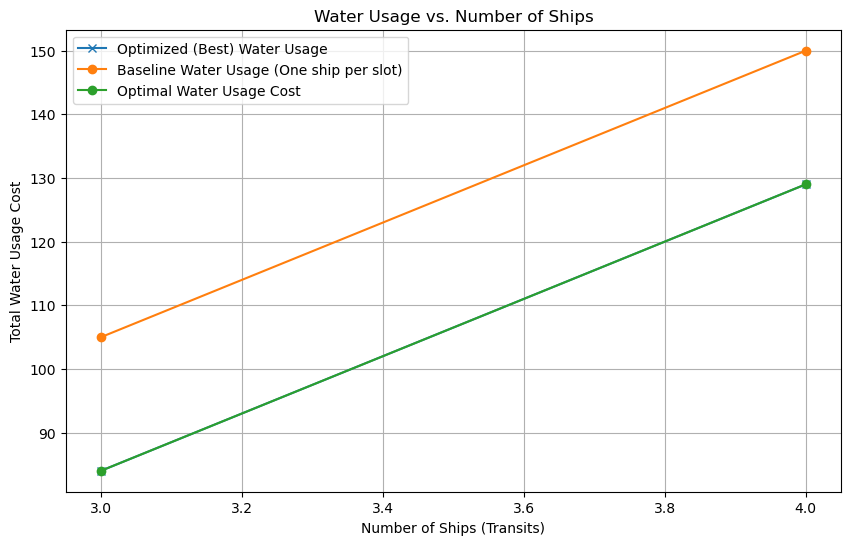

In [4]:
# Plot Reults of Experiment
plot(instance_sizes, best_water_costs, baseline_costs, optimal_water)

# QAA Implementation

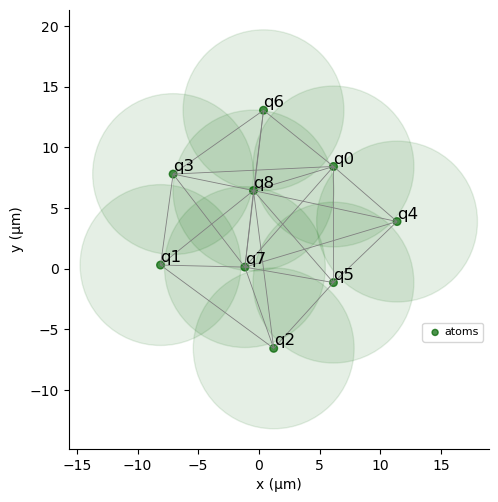

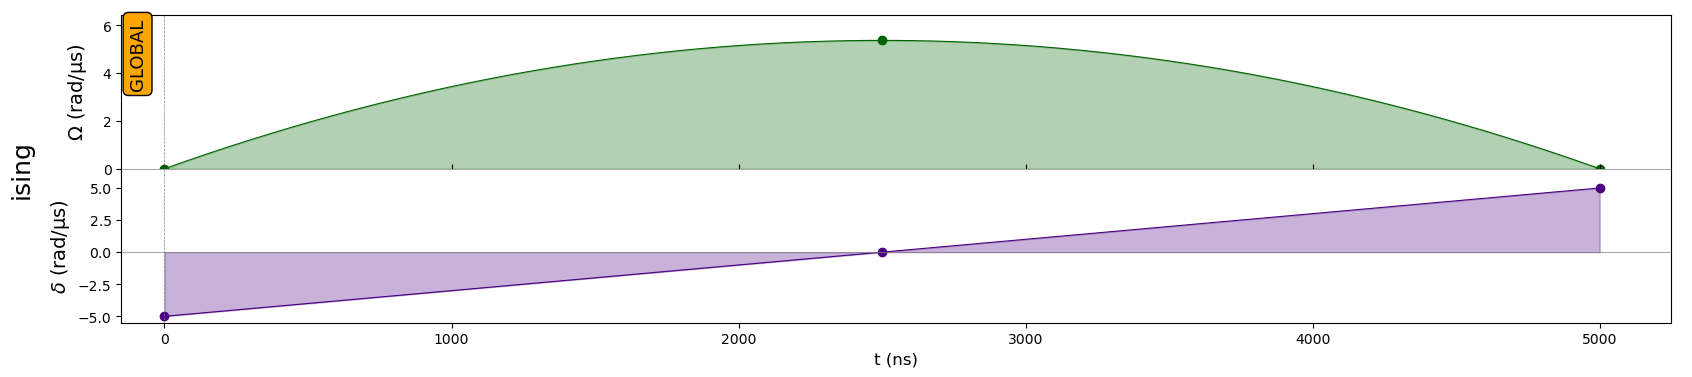

Running Simulation
Converting Bitstrings
Bitstring: 011010100
  Count: 378
  Assignment: {0: 0, 1: 1, 2: 1, 3: 0, 4: 1, 5: 0, 6: 1, 7: 0, 8: 0}
  Evaluation: (224.0, 84.0, 260, 400, 1, 1, ['Ship 1 assigned 2 times (Expected 1).', 'Time slot 1 exceeds lock length by 343.29999999999995 meters'])
----------------------------------------
Bitstring: 001010100
  Count: 146
  Assignment: {0: 0, 1: 0, 2: 1, 3: 0, 4: 1, 5: 0, 6: 1, 7: 0, 8: 0}
  Evaluation: (-111.0, 84.0, 195, 0, 0, 1, [])
----------------------------------------
Bitstring: 001110000
  Count: 99
  Assignment: {0: 0, 1: 0, 2: 1, 3: 1, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0}
  Evaluation: (289.0, 84.0, 195, 400, 0, 1, ['Ship 2 assigned 2 times (Expected 1).', 'Ship 3 assigned 0 times (Expected 1).'])
----------------------------------------
Bitstring: 010010100
  Count: 50
  Assignment: {0: 0, 1: 1, 2: 0, 3: 0, 4: 1, 5: 0, 6: 1, 7: 0, 8: 0}
  Evaluation: (44.0, 39.0, 195, 200, 1, 1, ['Time slot 1 exceeds lock length by 343.29999999999995 m

In [5]:
number_ships = 3
number_time_slots =3
assignment,evaluated_solutions, _ = run_simulation(number_ships, number_time_slots)

In [6]:
# Iterate over each Bitsring and its parameters
for bitsring, params in evaluated_solutions.items():
    # Check if the 7th parameter (index 6) is empty
    if not params[6]:
        print(f"Bitsring {bitsring} has parameters:")
        print('Water cost:', params[1])
    

Bitsring 001010100 has parameters:
Water cost: 84.0


This is the same results as our simulated annealing result verifying our methods